In [1]:
input('Warning: contains solution spoilers. Press enter to continue.')
import numpy as np
import matplotlib.pyplot as plt

# Problem set 2

## q1
part a


Taylor expand around $z=0$. Get $a=\frac{-3}{2\Delta z}$, $b=\frac{2}{\Delta z}$, $c=\frac{-1}{2\Delta z}$.

part b

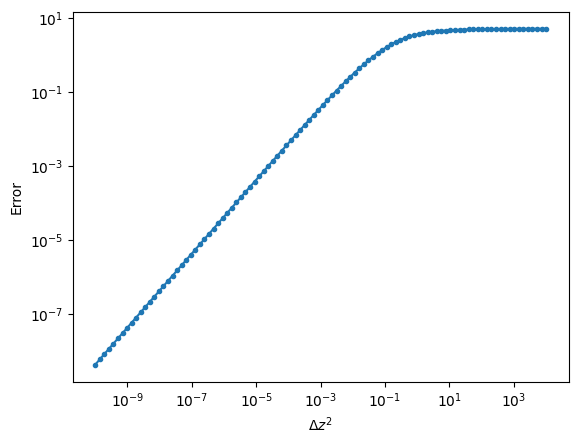

In [15]:
dz = np.logspace(-5, 2, 100)
a = -3/(2*dz)
b = 2/dz
c = -1/(2*dz)

T = lambda z: np.exp(-5*z)
dTdz = a*T(0) + b*T(dz) + c*T(2*dz)
plt.plot(dz**2, np.abs(dTdz+5), '.-')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Error')
plt.xlabel('$\Delta z^2$')
plt.show()

## Question 2

Instability happens when $|\frac{y_{n+1}}{y_n}| > 1$. Completing the square gives the required solution. Numerically...

2.1


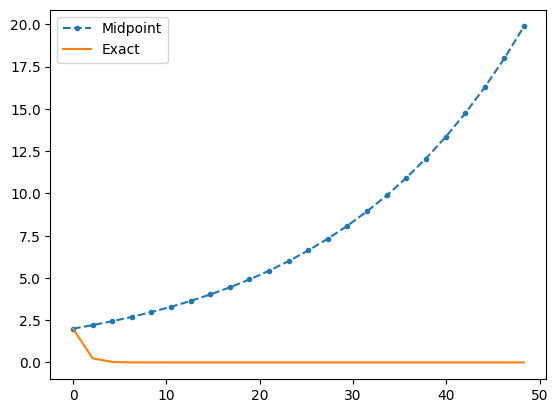

In [51]:
y0 = 2
dt = 2.1
T = 50
l = 1

print(l*dt)

t = np.arange(0, T, dt)
exact = np.exp(-l*t)*y0
y = [y0]

for i in range(1, len(t)):
    y.append(y[i-1] * (1-l*dt+1/2 * (l*dt)**2))
plt.plot(t, y, '.--', label='Midpoint')
plt.plot(t, exact, label='Exact')
plt.legend()
plt.show()

## Question 3

In [119]:
def AB(f, y0, dt, T, order=2):
    t = np.arange(0, T, dt)
    y = [y0]
    if order==1:
        coefs = [1]
    elif order==2:
        coefs = [3/2, -1/2]
    elif order==3:
        coefs = [23/12, -4/3, 5/12]
    else:
        raise ValueError('Order must be 1, 2 or 3')

    for i in range(1, order):
        y0 = y[i-1] + dt * f(y[i-1])  # Forward Euler startup
        y.append(y0)

    for i in range(order, len(t)):
        y.append(y[i-1] + dt * sum([c*f(y[i-j-1]) for j, c in enumerate(coefs)]))
    return t, np.array(y)

def plot(fn, sol, y0, dt, tn):
    t, AB2 = AB(fn, y0, dt, tn, 2)
    t, AB1 = AB(fn, y0, dt, tn, 1)
    t, AB3 = AB(fn, y0, dt, tn, 3)
    sol = sol(t)

    fig, ax = plt.subplots(1, 2, figsize=(14, 3))
    ax[0].set_title('Solution')
    ax[0].plot(t, sol, label='Analytical')
    ax[0].plot(t, AB1, '.-', label='AB1 (FE)')
    ax[0].plot(t, AB2, '.-', label='AB2')
    ax[0].plot(t, AB3, '.-', label='AB3')
    ax[0].legend()

    ax[1].set_title(f'Residual dt={dt}')
    ax[1].plot(t, np.abs(sol-AB1), label='AB1 (FE)')
    ax[1].plot(t, np.abs(sol-AB2), label='AB2')
    ax[1].plot(t, np.abs(sol-AB3), label='AB3')
    ax[1].set_yscale('log')
    ax[1].legend()
    plt.show()

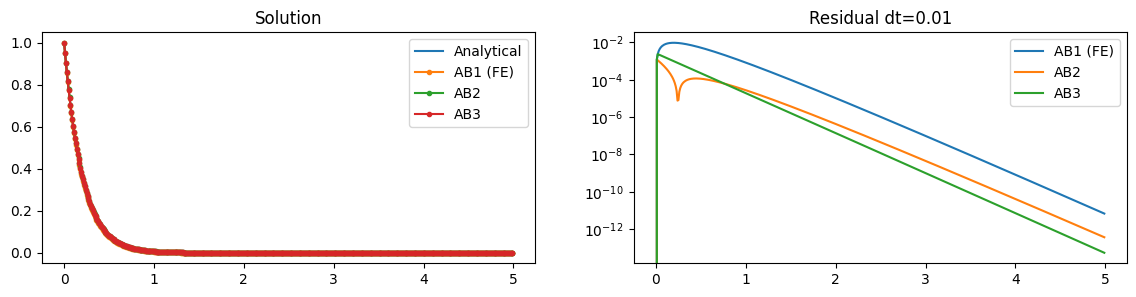

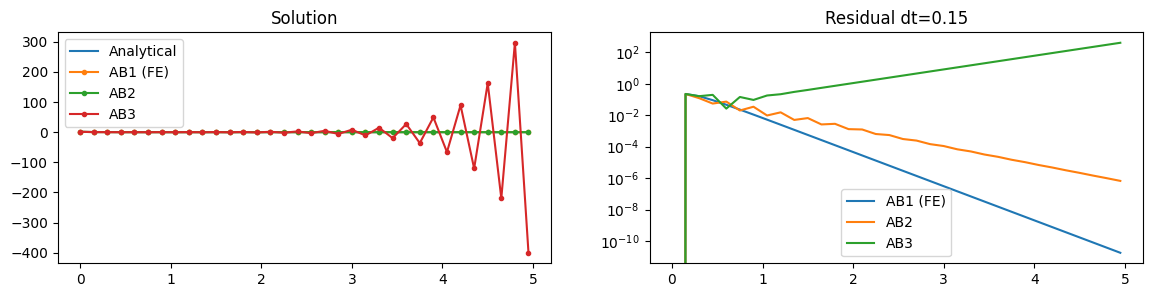

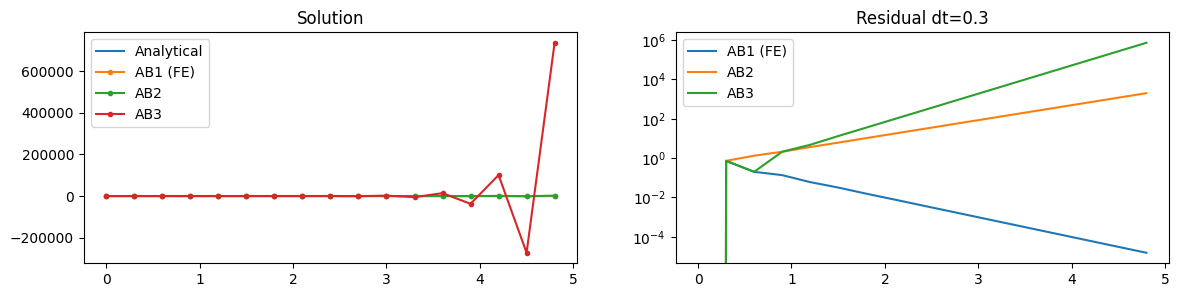

In [132]:
w = 5
y0 = 1
T = 5

plot(lambda y: -w*y, lambda t: y0*np.exp(-w*t), y0, 0.01, T)
plot(lambda y: -w*y, lambda t: y0*np.exp(-w*t), y0, 0.15, T)
plot(lambda y: -w*y, lambda t: y0*np.exp(-w*t), y0, 0.3, T)

AB3 has best accuracy (third order), but has the worst stability.

## Question 4

See PS1 bonus